In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [5]:
features = ['bike_count','hour','temp','humidity','wind','visibility','dew_pt_temp','radiation','rain','snow','functional']

In [38]:
df = pd.read_csv('https://github.com/sainihimanshu1999/Machine_Learning/raw/main/Logistic%20and%20Linear%20models/Linear/SeoulBikeData.csv').drop(['Date', 'Holiday','Seasons'],axis=1)

In [39]:
df.columns = features
df['functional'] = (df['functional']=='Yes').astype(int)
df = df[df['hour']==12]
df = df.drop(['hour'],axis=1)

In [40]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


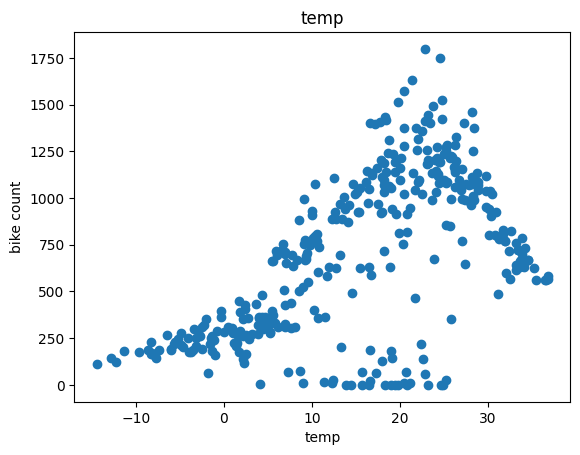

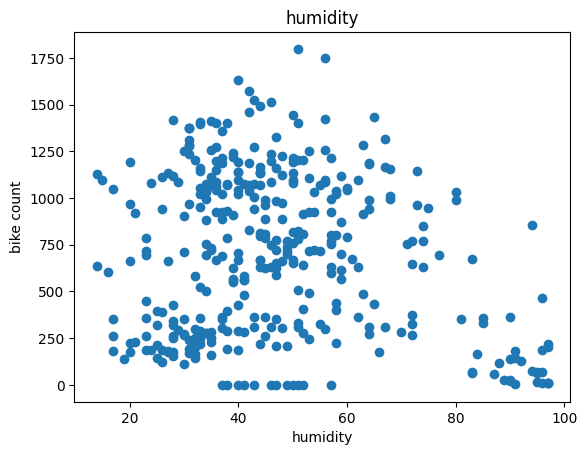

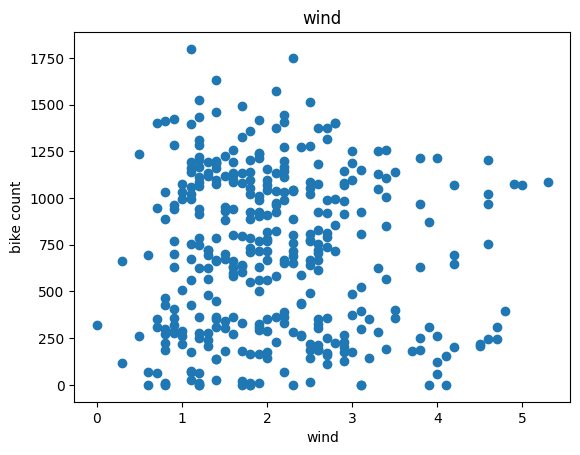

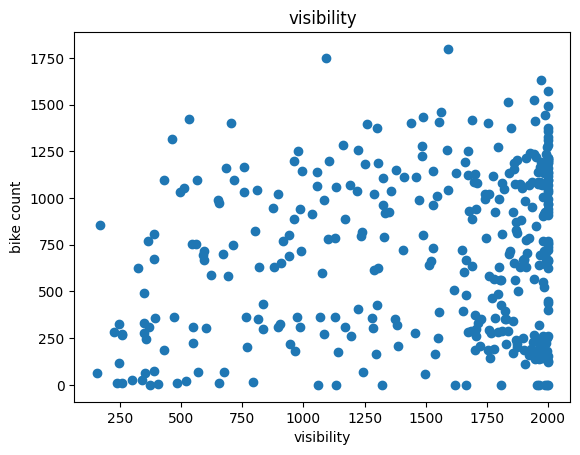

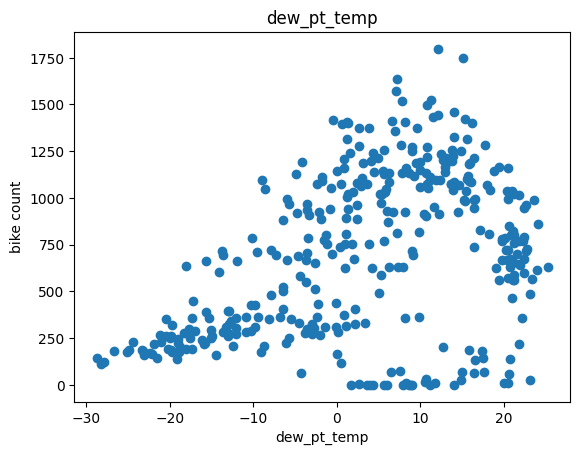

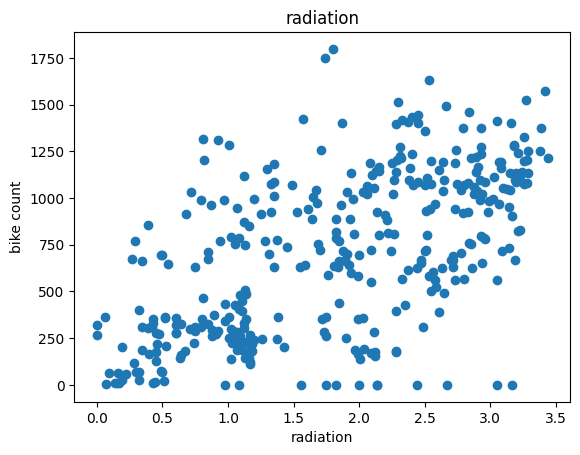

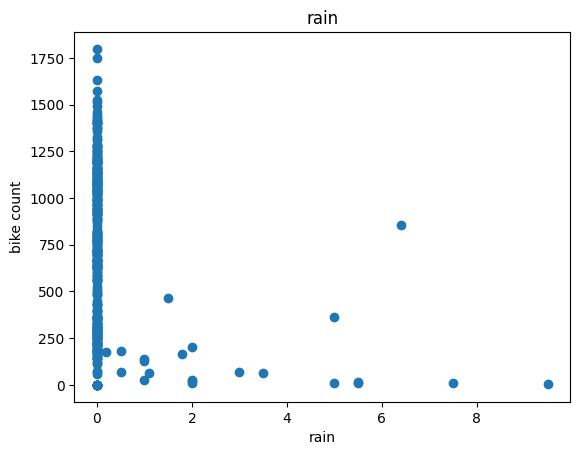

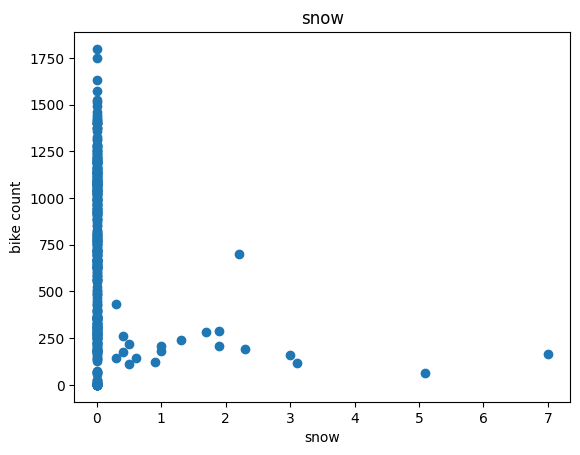

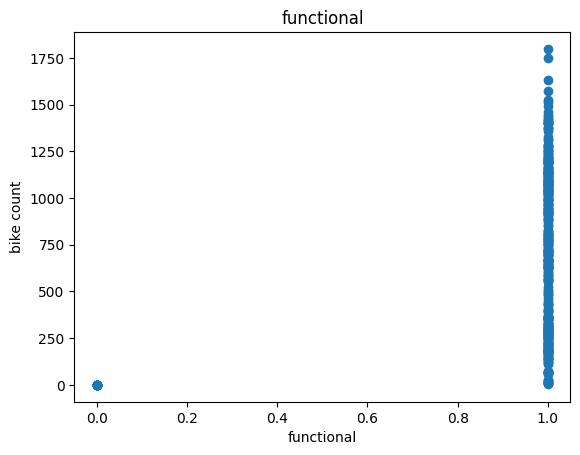

In [34]:
for label in df.columns[1:]:
  plt.scatter(df[label],df['bike_count'])
  plt.title(label)
  plt.ylabel('bike count')
  plt.xlabel(label)
  plt.show()

In [41]:
df = df.drop(['wind','visibility','functional'],axis=1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [42]:
##Train valid test split

In [65]:
train,valid,test = np.split( df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [66]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels)==1:
      X=dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((X,y))

  return data,X,y

In [47]:
train_temp,X_train_temp,y_train_temp = get_xy(train,'bike_count',['temp'])
valid_temp,X_valid_temp,y_valid_temp = get_xy(valid,'bike_count',['temp'])
test_temp,X_test_temp,y_test_temp = get_xy(test,'bike_count',['temp'])

In [51]:
X_train_temp

array([[ -3.7],
       [ 24.4],
       [ 29.8],
       [ 14.7],
       [ 20.5],
       [  0. ],
       [ 22.9],
       [ 22.1],
       [-12.8],
       [ 23.2],
       [ 28.4],
       [ 27. ],
       [ 18.4],
       [ 19.4],
       [ 31.9],
       [ -5.5],
       [ 25.3],
       [ 24.9],
       [ -3.9],
       [ 18.9],
       [ -7.7],
       [ 34.5],
       [ 18.8],
       [ -6. ],
       [  3.9],
       [ -0.8],
       [ 12.7],
       [ 15.7],
       [ 21.4],
       [ 23.7],
       [ 22.5],
       [ -1.3],
       [ 29.8],
       [ -8.3],
       [ 25.8],
       [ -3.2],
       [  9. ],
       [  9.1],
       [ 26.3],
       [  1.7],
       [ 19.5],
       [ -3.5],
       [ 36.8],
       [ -3.2],
       [  2.7],
       [-11.3],
       [ 29.8],
       [ 31.9],
       [ 30.9],
       [ 20.5],
       [ 16.6],
       [  1.1],
       [ 12.8],
       [  7.3],
       [ 11.7],
       [ 11.9],
       [ 20.5],
       [ 18.8],
       [ 11.5],
       [ 31.2],
       [ 16.5],
       [  4.7],
       [

In [53]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)

LinearRegression()

In [55]:
print(temp_reg.coef_, temp_reg.intercept_)

[[19.97931018]] [384.2272266]


In [56]:
temp_reg.score(X_test_temp, y_test_temp)

0.3671047612793923

In [57]:
##Multiple linear regression

In [67]:
train_all,X_train_all,y_train_all = get_xy(train,'bike_count',df.columns[1:])
valid_all,X_valid_all,y_valid_all = get_xy(valid,'bike_count',df.columns[1:])
test_all,X_test_all,y_test_all = get_xy(test,'bike_count',df.columns[1:])

In [68]:
train_all

array([[  20.5,   42. ,    7.1, ...,    0. ,    0. , 1573. ],
       [  15.1,   54. ,    5.8, ...,    0. ,    0. , 1034. ],
       [  12.5,   53. ,    3.1, ...,    0. ,    0. , 1105. ],
       ...,
       [  10.6,   72. ,    5.7, ...,    0. ,    0. ,  769. ],
       [  27.3,   51. ,   16.2, ...,    0. ,    0. , 1400. ],
       [  19.1,   91. ,   17.5, ...,    0. ,    0. ,  143. ]])

In [69]:
all_reg = LinearRegression()

In [70]:
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [71]:
all_reg.score(X_test_all, y_test_all)

0.2223751003914224